## Customer Churn Prediction

## Initial Data Preparation

In [134]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [135]:
df = pd.read_csv("E:\ML_PROJECTSS\Cutomer_Churn_New\Customer_churn_dataset.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [137]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [138]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [139]:
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [140]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [141]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [142]:
len(df[df['TotalCharges']==' '])

11

In [143]:
# Convert the "TotalCharges" column to numeric and enforce white spaces to be 'NaN'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [144]:
len(df[df['TotalCharges']==' '])

0

In [145]:
# Just Confirm
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [146]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [147]:
df.columns = df.columns.str.lower()

In [148]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [149]:
# Churn
df[df.churn == 'Yes']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [150]:
# Convert churn to Numerical Value
(df.churn == 'Yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [151]:
df.churn = (df.churn == 'Yes').astype(int)

In [152]:
df.churn.value_counts()  #imbalance

churn
0    5174
1    1869
Name: count, dtype: int64

In [153]:
df.churn.value_counts(normalize= True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [154]:
df.churn.mean()

0.2653698707936959

## Data Splitting

Divide the entire dataset into three subsets: Training Set, Validation Set, and Testing Set.

- Training Set: Used for training our model.
- Validation Set: Utilized to validate and fine-tune the model(s).
- Testing Set: Employed to evaluate the final model after tuning and selecting the best one.

In [155]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


## Missing Values

In [156]:
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        6
churn               0
dtype: int64

We have missing values in the "total charges" column and need to determine the optimal method for imputing them.

count    4501.000000
mean     2240.586892
std      2248.575970
min        18.800000
25%       385.550000
50%      1360.250000
75%      3713.950000
max      8684.800000
Name: totalcharges, dtype: float64


<Axes: >

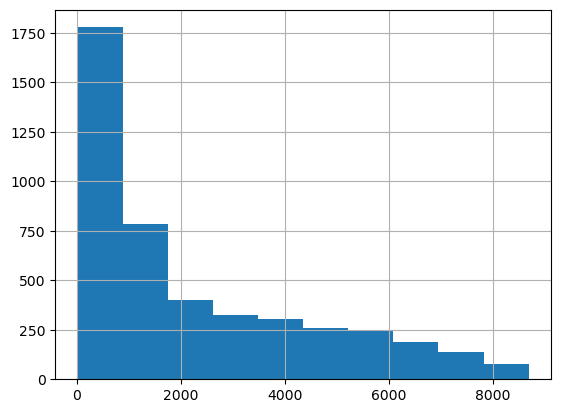

In [157]:
print(df_train['totalcharges'].describe())
df_train['totalcharges'].hist()

As the distribution of totalcharges is skewed, we can impute the missing values with its median

The median of "total charges" was computed from the training set and will be applied to the other sets.

In [158]:
df_train.totalcharges.isnull().sum()

6

In [159]:
df_valid.totalcharges.isnull().sum()

2

In [160]:
df_test.totalcharges.isnull().sum()

3

In [161]:
total_charges_median = df_train['totalcharges'].median()

# Imputing 
df_train['totalcharges'] = df_train['totalcharges'].fillna(total_charges_median)
df_valid['totalcharges'] = df_valid['totalcharges'].fillna(total_charges_median)
df_test['totalcharges'] = df_test['totalcharges'].fillna(total_charges_median)

print(df_train.totalcharges.isnull().sum())
print(df_valid.totalcharges.isnull().sum())
print(df_test.totalcharges.isnull().sum())

0
0
0



Exploratory Data Analysis (EDA) typically includes multiple visualizations to gain insights into the data.

In [162]:
df_train.select_dtypes(include=['object']).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [163]:
categorical = list(df_train.select_dtypes(include=['object']).columns)
numerical = list(df_train.select_dtypes(include=['number']).columns)

In [164]:
numerical.remove('churn')

In [165]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [166]:
df_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Assessing feature importance is a common practice within exploratory data analysis, aiding in identifying variables crucial for the model. This analysis offers deeper insights into the dataset, addressing inquiries such as "What factors contribute to customer churn?" and "What traits are associated with individuals who churn?"

The Risk Ratio is calculated as the group rate divided by the global rate.

- A group with a risk ratio close to 1 indicates minimal risk.
- A group with a risk ratio lower than 1 suggests that clients in this group are less likely to churn compared to the overall population.
- A group with a risk ratio higher than 1 indicates a higher likelihood of churn within the group compared to the population as a whole.

In [167]:
global_mean = df_train.churn.mean()
round(global_mean, 2)

0.27

In [168]:
# df_train.groupby('gender').mean()['churn']
# Check data types

print(df_train['churn'].dtype)

# Check unique values
print(df_train['churn'].unique())

# Convert non-numeric values to NaN
df_train['churn'] = pd.to_numeric(df_train['churn'], errors='coerce')

# Remove rows with NaN values (if applicable)
df_train = df_train.dropna(subset=['churn'])

# Convert data type to numeric
df_train['churn'] = df_train['churn'].astype(float)

# Now you can try computing the mean again
mean_churn_by_gender = df_train.groupby('gender')['churn'].mean()
print(mean_churn_by_gender)

int32
[0 1]
gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64


In [169]:
churn_gender = df_train.groupby('gender').churn.mean()
churn_gender  # we can compare it with the global churn rate

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

The marginal disparity in rates renders the value insignificant when predicting churn, as this group of customers doesn't significantly differ from the rest of the customer base.

In [170]:
churn_partner = df_train.groupby('partner').churn.mean()
churn_partner

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64


The variance is not negligible; there's something within that group that distinguishes it from the rest. A machine learning algorithm should be capable of discerning this and incorporating it into its predictions.

In [171]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.023245
Male      0.976682
Name: churn, dtype: float64

In [172]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.215688
Yes    0.763545
Name: churn, dtype: float64


Let's summarize the Risk Ratio for all categorical features in tables.

In [173]:
from IPython.display import display
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']) 
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


,mean,diff,risk
seniorcitizen,,,
0,0.241700,-0.026328,0.901773
1,0.401617,0.133590,1.498418


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


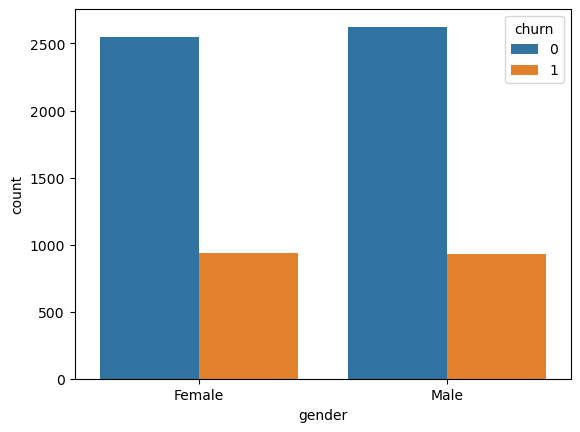

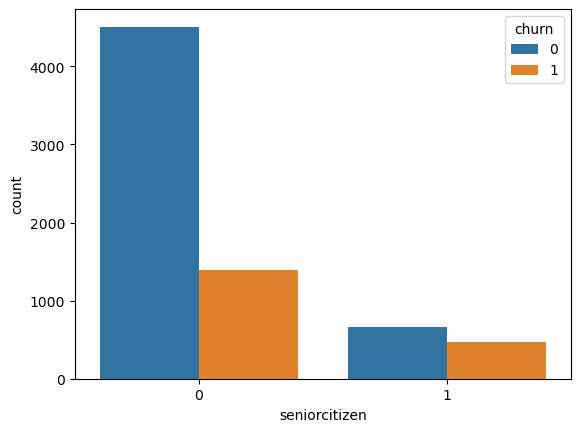

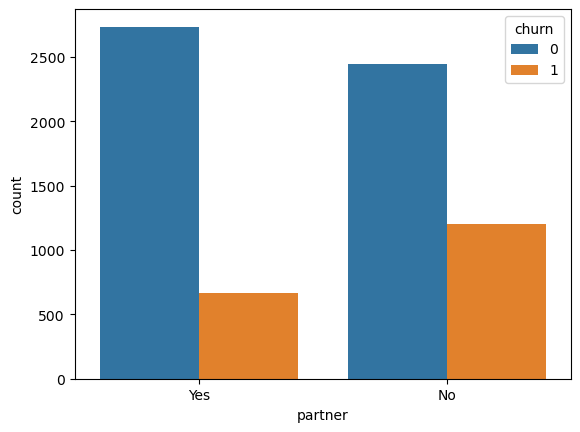

In [174]:
df['churn'] = df['churn'].astype(str)

for feature in categorical[:3]:                                           
    _=sns.countplot(x= feature, hue = 'churn', data=df)
    plt.show()

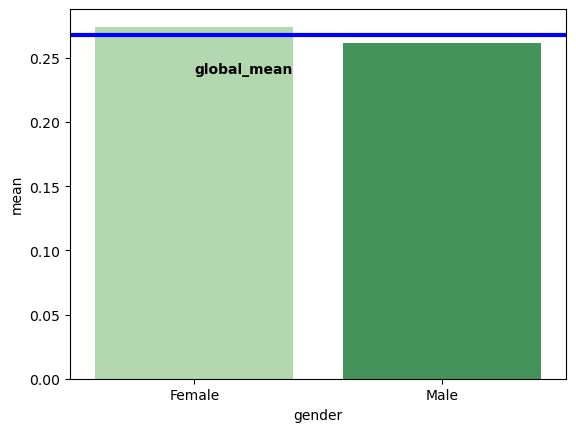

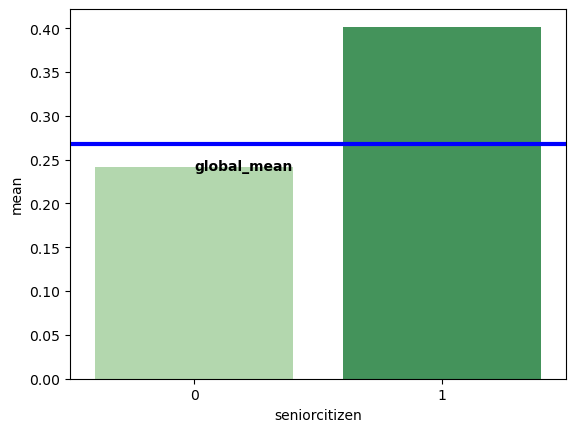

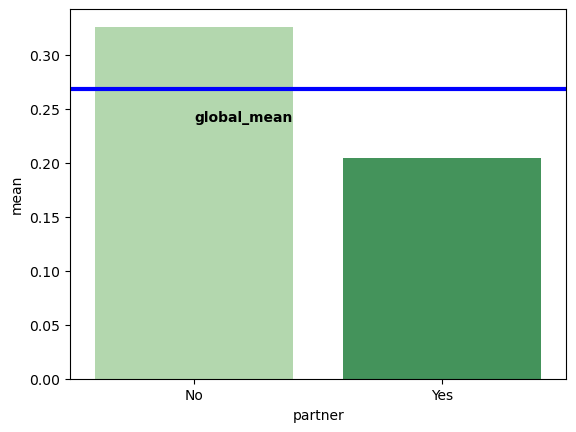

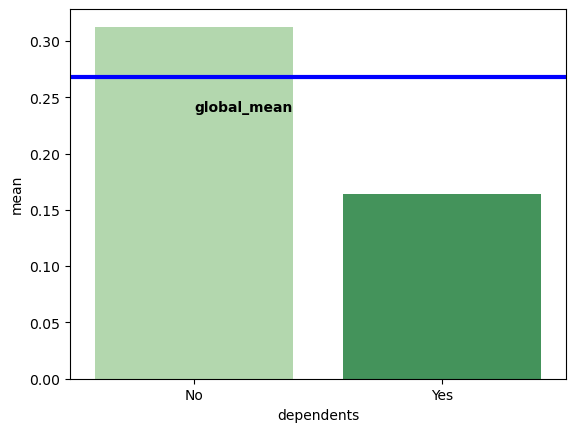

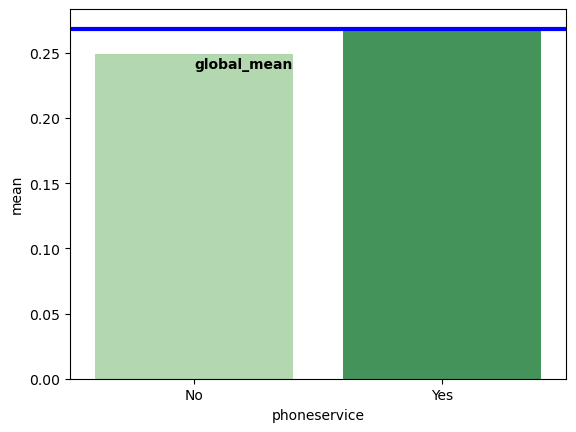

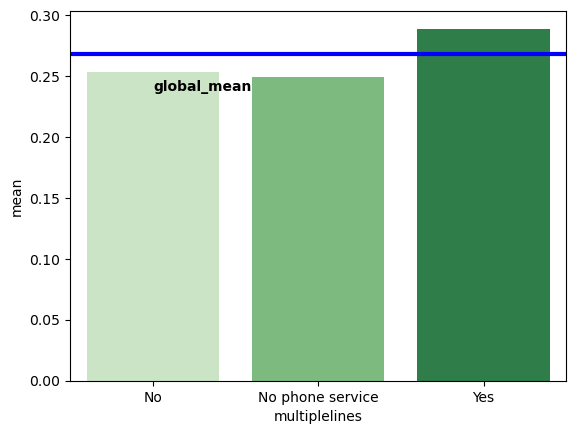

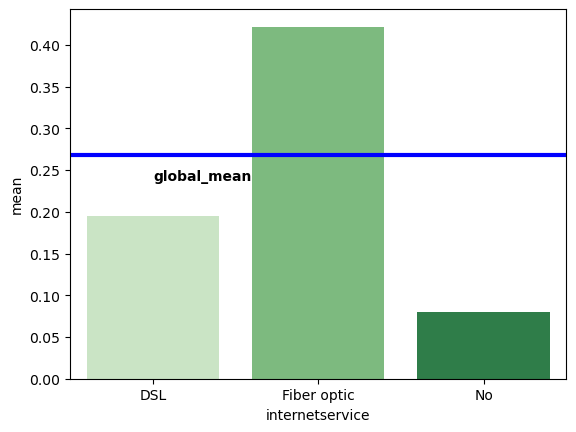

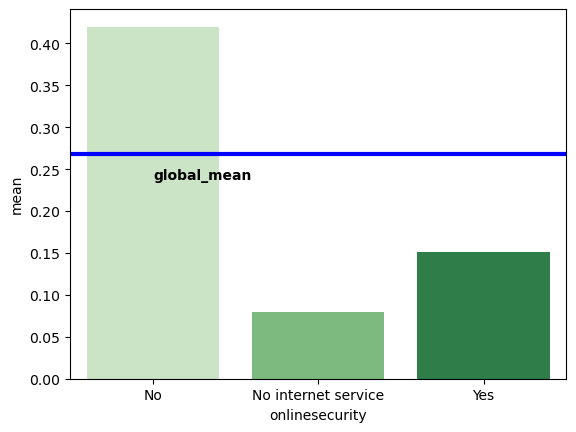

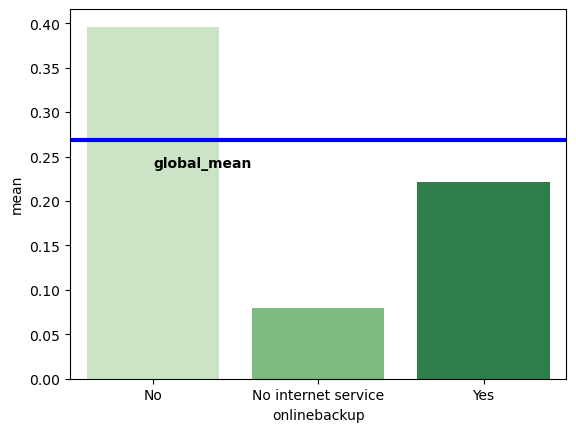

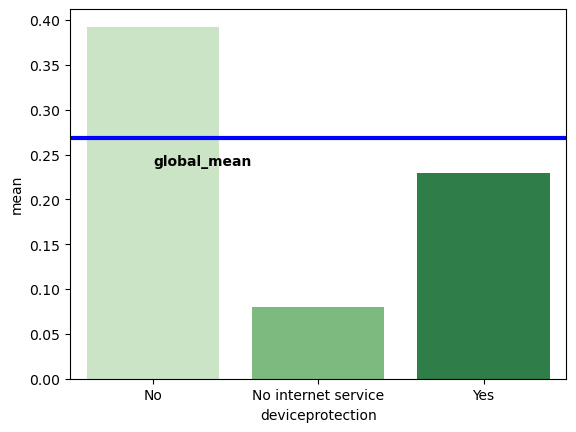

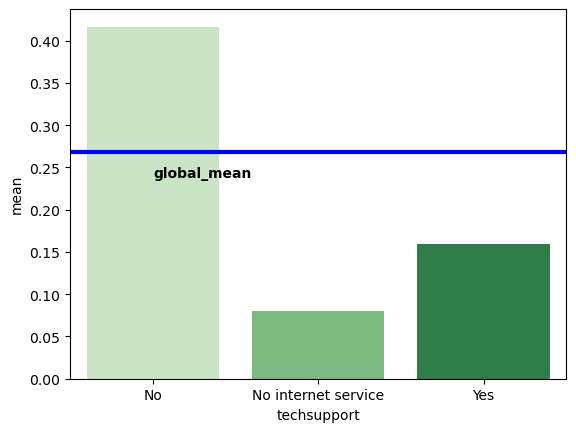

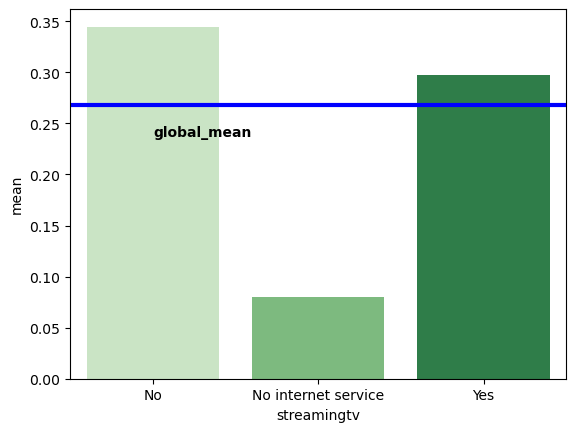

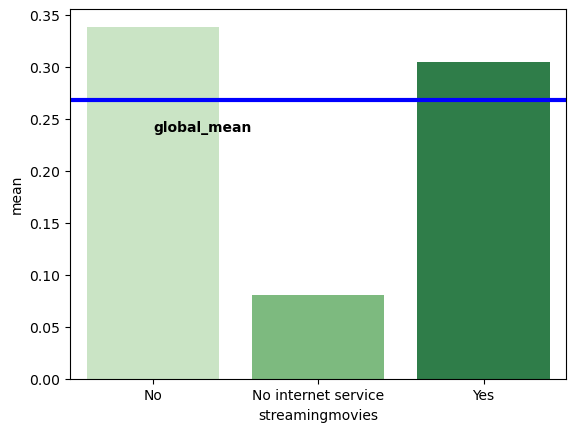

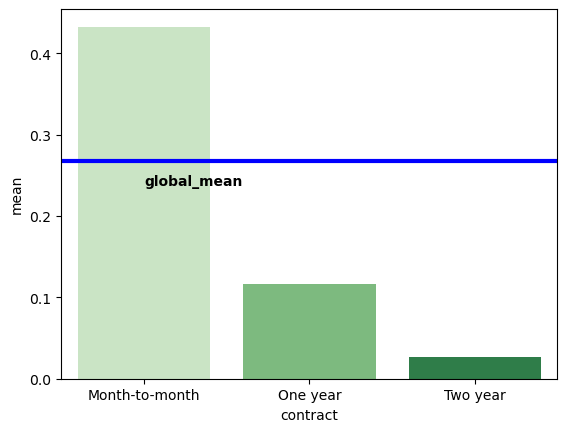

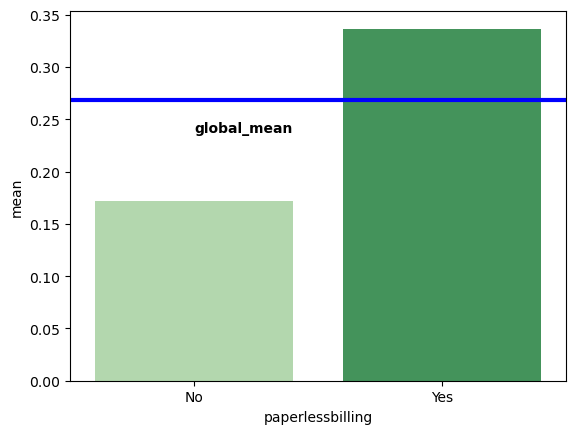

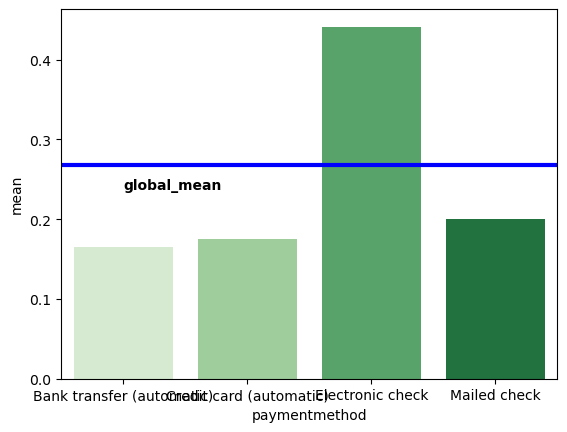

In [175]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

- Gender doesn't show a significant difference in churn rates between females and males.
- Senior citizens are more prone to churn compared to non-seniors.
- Customers with a partner exhibit lower churn rates than those without.
- Subscribers utilizing phone services have lower churn rates, while those without phone services are even less likely to churn.
- Clients lacking tech support are more likely to churn compared to those with tech support.
- Monthly contract holders demonstrate higher cancellation rates, whereas individuals with two-year contracts churn very infrequently.

# Mutual Information

- It's more effective to compare the importance of features.
- Mutual information provides a measure to quantify the level of dependency between two categorical variables. However, it's ineffective when one of the features is numerical.
- The mutual information between a feature and the target variable is calculated as the entropy of the feature minus the conditional entropy of the feature given the target.

In [176]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


- Greater values of mutual information signify a stronger degree of dependence: when the mutual information between a categorical variable and the target is high, this categorical variable becomes significantly valuable for predicting the target.
- Conversely, if the mutual information is low, the categorical variable and the target are independent, rendering the variable less useful for predicting the target.

## Correlation Coefficient
- The correlation coefficient, specifically Pearson’s correlation coefficient, ranges from -1 to 1.

- Positive correlation indicates that as one variable increases, the other tends to increase as well. In the case of a binary target, higher values of the variable correspond to more occurrences of ones, while lower values correspond to more zeros.

- Zero correlation signifies no relationship between the two variables; they are entirely independent.

- Negative correlation occurs when one variable increases while the other decreases. In the binary scenario, higher values of the variable correspond to more zeros than ones in the target, and vice versa for lower values.


In [178]:
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199484
dtype: float64

# Tenure
The correlation between tenure and churn is -0.35, indicating a negative relationship. Therefore, as customers stay for longer periods, they tend to churn less frequently.

In [180]:
import pandas as pd

# Convert 'churn' column to numeric, coerce errors to NaN
df['churn'] = pd.to_numeric(df['churn'], errors='coerce')

# Filter DataFrame for 'tenure' <= 2 and compute mean of 'churn' column
t1 = df[df['tenure'] <= 2]['churn'].mean()
print(t1)

t1 =df[df['tenure'] <= 2].churn.mean()
t1

0.5835266821345708


0.5835266821345708

In [181]:
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t2 

0.4033232628398791

In [182]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

0.17490952955367914

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


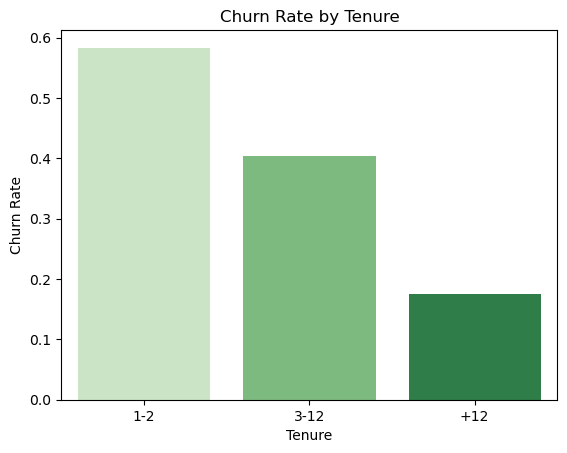

In [183]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');


# Monthly Charges
- The coefficient for monthly charges is positive at 0.19, suggesting that customers who pay higher monthly charges are more likely to churn.

In [185]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

0.08841463414634146

In [186]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

0.22807017543859648

In [187]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

0.3178752107925801

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


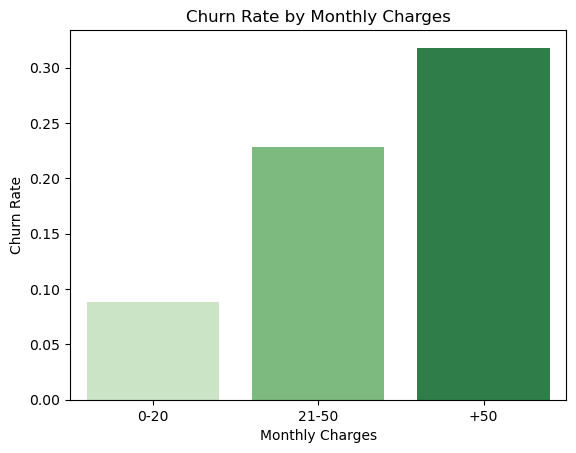

In [188]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');


# Total Charges
- Total charges exhibit a negative correlation, which aligns with expectations: as customers remain with the company for longer periods, their total payments increase, decreasing the likelihood of them leaving.

In [190]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc1

0.36985827860352577

In [191]:
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc2

0.2137150466045273

In [192]:
tc3 = df[df['totalcharges'] > 5000].churn.mean()
tc3

0.13832599118942732

sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

# Preprocessing

## Handling Categorical Variables

In [194]:
df_train_enc= pd.get_dummies(df_train, drop_first=True)
df_train_enc.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2678,30,19.70,625.05,0.0,True,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,True
5594,23,83.75,1849.95,0.0,False,False,True,True,True,False,...,False,True,False,False,False,False,True,False,True,False
4077,14,95.80,1346.30,0.0,False,True,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4758,56,19.70,1051.90,0.0,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False
4445,63,98.00,6218.45,0.0,False,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [196]:
# Applying one hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(df_train)
df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())
df_train_enc

,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,30.0,19.70,625.05,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,23.0,83.75,1849.95,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.0,95.80,1346.30,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,19.70,1051.90,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,63.0,98.00,6218.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,52.0,80.85,4079.55,0.0
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,18.0,25.15,476.80,0.0
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,90.00,190.05,1.0
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,27.0,24.50,761.95,0.0


In [197]:
X_train = df_train_enc.drop('churn', axis=1)
y_train = df_train_enc['churn']

In [198]:
valid_enc = transformer.transform(df_valid)
df_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())
X_valid = df_valid_enc.drop('churn', axis=1)
y_valid = df_valid_enc['churn']

test_enc = transformer.transform(df_test)
df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = df_test_enc.drop('churn', axis=1)
y_test = df_test_enc['churn']

## Scaling Numerical Variables

In [199]:
df_train[numerical].describe()

,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000
mean,32.001553,64.312536,2239.414932
std,24.558539,30.089423,2247.307720
min,0.000000,18.250000,18.800000
25%,8.000000,34.700000,386.850000
50%,28.000000,70.150000,1360.250000
75%,55.000000,89.575000,3708.000000
max,72.000000,118.350000,8684.800000


In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(df_train[numerical])

array([[-0.08151035, -1.48282956, -0.71843479],
       [-0.36657522,  0.64606159, -0.17332212],
       [-0.7330872 ,  1.04657898, -0.3974596 ],
       ...,
       [-1.22176983,  0.85379883, -0.91202122],
       [-0.20368101, -1.32328737, -0.6575107 ],
       [-0.93670496,  0.54967152, -0.66209447]])

In [201]:
# Transformers
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns

In [202]:
X_train , X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [203]:
X_train

array([[-0.08151035, -1.48282956, -0.71843479, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17332212, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.3974596 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91202122, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.6575107 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66209447, ...,  0.        ,
         1.        ,  0.        ]])

In [204]:
y_train = df_train['churn']
y_valid = df_valid['churn']
y_test = df_test['churn']

# Modeling
- For classification, we will employ logistic regression as our model of choice.







# Logistic Regression 
- Logistic regression, despite being a linear model, serves as a classification model rather than regression.

- The output of logistic regression represents probability, specifically the likelihood of an observation being positive (in our case, the probability of a customer churning).

- To ensure predictions remain within the range of zero to one, we utilize a sigmoid function. The complete formula for logistic regression is as follows:

## Linear Regression vs. Logistic Regression

In [207]:
def linear_regression(xi):
    result = bias
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [208]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob

In [209]:
import math
def sigmoid(score):
    return 1 / (1 + math.exp(-score))

## Applying Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, y_train)  # ====> Weights

LogisticRegression(random_state=1, solver='liblinear')

In [211]:
len(columns)

30

In [212]:
len(model_1.coef_[0])

30

In [213]:
y_val_pred = model_1.predict_proba(X_valid)
y_val_pred

array([[0.99288603, 0.00711397],
       [0.79970012, 0.20029988],
       [0.78814886, 0.21185114],
       ...,
       [0.96098379, 0.03901621],
       [0.41988322, 0.58011678],
       [0.70089296, 0.29910704]])

In [214]:
y_test_pred = model_1.predict_proba(X_test)
y_test_pred

array([[0.94321286, 0.05678714],
       [0.91333401, 0.08666599],
       [0.66580263, 0.33419737],
       ...,
       [0.99473604, 0.00526396],
       [0.80573192, 0.19426808],
       [0.39372236, 0.60627764]])

In [215]:
y_test_pred[:,1]

array([0.05678714, 0.08666599, 0.33419737, ..., 0.00526396, 0.19426808,
       0.60627764])

<!-- This output (probabilities) is often called soft predictions. These tell us the probability of churning as a number between zero and one. It’s up to us to decide how to interpret this number and how to use it.

To get the binary predictions, hard predictions, we take the probabilities and cut them above a certain threshold -->

- The output, referred to as soft predictions, provides probabilities of churning as values between zero and one. Interpretation and utilization of these probabilities are subjective.

- To obtain binary predictions, or hard predictions, we apply a threshold to the probabilities, classifying them as either churn or not churn based on whether they exceed the threshold.


In [216]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True])

In [217]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [218]:
y_pred = model_1.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [219]:
y_test_pred == y_test

3381     True
6180     True
4829     True
3737    False
4249     True
        ...  
2563     True
2028     True
2899     True
3474     True
5154     True
Name: churn, Length: 1409, dtype: bool

In [220]:
(y_test_pred == y_test).mean()

0.808374733853797

In [221]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


In [222]:
important_cat = df_mi.head().index.to_list()
important_cat

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [223]:
X_train, X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)

model_2 = LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


## Using Numerical Features Only

In [224]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [225]:
X_train = df_train[numerical]
X_valid = df_valid[numerical]
X_test  = df_test[numerical]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.79
LogisticRegression Testing Accuracy:  0.8


# Model Saving

In [226]:
import pickle 

pickle.dump(model_2, open("log_reg.pkl", 'wb'))

# Model Loading

In [227]:
loaded_model = pickle.load(open('log_reg.pkl', 'rb'))

# Model Usage

In [228]:
df_test[important_cat + numerical].iloc[10]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [229]:
# Transformers
def preprocess_fit(df_train, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit(df_train[cat+num])
    return transformer

In [230]:
transformer = preprocess_fit(df_train, numerical, important_cat)

In [231]:
df_test.iloc[10][important_cat + numerical]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [232]:
pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
407,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [233]:
x =transformer.transform(pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T)
x

array([[-6.32493609e-05,  9.85088758e-01,  2.76821942e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [234]:
loaded_model.predict(x)

array([0.])

In [235]:
y_test.iloc[10]

0

In [236]:
x = df_test.iloc[10][important_cat + numerical].to_dict()

In [237]:
x

{'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [238]:
x = pd.DataFrame(x, index=[0])
x

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [239]:
transformer.transform(x)

array([[-6.32493609e-05,  9.85088758e-01,  2.76821942e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

# Transformer Saving

In [240]:
pickle.dump(transformer, open("transformer.pkl", 'wb'))

In [241]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('log_reg.pkl', 'rb'))

In [242]:
cust ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [243]:
pd.DataFrame(cust, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [244]:
cust = trans.transform(pd.DataFrame(cust, index=[0]))

In [245]:
cust

array([[-6.32493609e-05,  9.85088758e-01,  2.76821942e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [246]:
model.predict(cust)[0]

0.0

In [247]:
if model.predict(cust)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn


In [248]:
model.predict_proba(cust)[0][1]

0.4977549614214852

# Classification Metrics

In [249]:
from sklearn.metrics import classification_report

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.62      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



<Axes: >

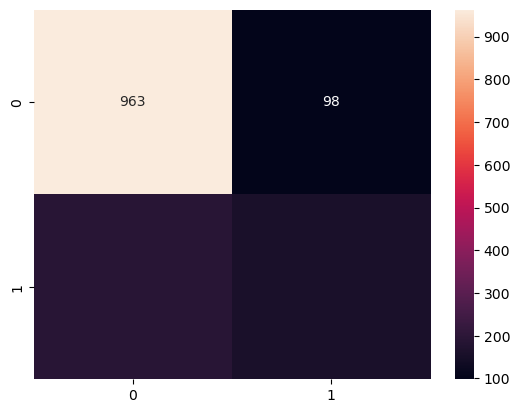

In [250]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True, fmt='0.0f')

In [251]:
cm

array([[963,  98],
       [190, 158]], dtype=int64)

In [252]:
(Tn, Fp), (Fn, Tp) = cm

In [253]:
print('True Negative: ', Tn)
print('False Positive: ', Fp)
print('False Negative: ', Fn)
print('True Positive: ', Tp)

True Negative:  963
False Positive:  98
False Negative:  190
True Positive:  158


In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Accuracy:  0.7955997161107168
Precision:  0.6171875
Recall:  0.4540229885057471
F1-Score:  0.5231788079470199


In [255]:
print('Precision: ', precision_score(y_test, y_pred, pos_label=0))

Precision:  0.8352124891587164


In [256]:
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))

Precision:  0.7813638757965921


## Testing 

In [259]:
cust2 ={'contract': 'One year',
 'onlinesecurity': 'Yes',
 'techsupport': 'No',
 'internetservice': 'DSL',
 'onlinebackup': 'No',
 'tenure': 34,
 'monthlycharges': 56.95,
 'totalcharges': 1889.5}

In [260]:
pd.DataFrame(cust2, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,One year,Yes,No,DSL,No,34,56.95,1889.5


In [261]:
if model.predict(cust2)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn


In [262]:
cust3 ={'contract': 'Month-to-month',
 'onlinesecurity': 'Yes',
 'techsupport': 'No',
 'internetservice': 'DSL',
 'onlinebackup': 'Yes',
 'tenure': 2,
 'monthlycharges': 53.85,
 'totalcharges': 108.85}

In [263]:
pd.DataFrame(cust3, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,Yes,No,DSL,Yes,2,53.85,108.85


In [266]:
pd.DataFrame(cust3, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,Yes,No,DSL,Yes,2,53.85,108.85


In [267]:
cust3 = trans.transform(pd.DataFrame(cust3, index=[0]))

In [268]:
cust3

array([[-1.22176983, -0.34775333, -0.94815735,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

In [269]:
model.predict(cust3)[0]

0.0

In [270]:
if model.predict(cust3)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn


In [271]:
cust4 ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'No',
 'tenure': 2,
 'monthlycharges': 70.7,
 'totalcharges': 151.65}

In [272]:
pd.DataFrame(cust4, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,No,2,70.7,151.65


In [273]:
cust4 = trans.transform(pd.DataFrame(cust4, index=[0]))

In [274]:
cust4

array([[-1.22176983,  0.21230625, -0.92911023,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

In [275]:
model.predict(cust4)[0]

1.0

In [276]:
if model.predict(cust4)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Churn
